# CASA Experiment Results Analysis V2

Enhanced visualization using MNIST grid notebook styling for paper-ready figures.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set plotting parameters for paper-ready figures (from MNIST grid style)
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 11
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["axes.titlesize"] = 13
plt.rcParams["xtick.labelsize"] = 10
plt.rcParams["ytick.labelsize"] = 10
plt.rcParams["legend.fontsize"] = 10
plt.rcParams["figure.dpi"] = 100

## Load Experiment Results

In [12]:
# Load the global metrics CSV
# Try different paths for the results
try:
    df_metrics = pd.read_csv("../../../results/casa/global_metrics.csv")
except:
    try:
        df_metrics = pd.read_csv("../../../results/casa-fedavg/global_metrics.csv")
    except:
        print("Could not load metrics file. Please check the path.")
        df_metrics = pd.DataFrame()

if not df_metrics.empty:
    print(f"Loaded {len(df_metrics)} records")
    print(f"Metrics: {df_metrics['metric'].unique().tolist()}")
    print(f"Rounds: {df_metrics['round'].min()} - {df_metrics['round'].max()}")
    print(f"Nodes: {sorted(df_metrics['node'].unique())}")

Loaded 320 records
Metrics: ['loss', 'compile_metrics']
Rounds: 0 - 30
Nodes: ['node-0', 'node-1', 'node-2', 'node-3', 'node-4', 'node-5', 'node-6', 'node-7', 'node-8', 'node-9']


## Average Results per Round

In [13]:
if not df_metrics.empty:
    # Average loss per round
    loss_df = df_metrics[df_metrics["metric"] == "loss"]
    avg_loss = loss_df.groupby("round")["value"].agg(["mean", "std", "count"]).reset_index()
    avg_loss.columns = ["round", "mean", "std", "count"]
    avg_loss = avg_loss.sort_values("round")

    # Average accuracy per round
    acc_df = df_metrics[df_metrics["metric"] == "compile_metrics"]
    avg_accuracy = acc_df.groupby("round")["value"].agg(["mean", "std", "count"]).reset_index()
    avg_accuracy.columns = ["round", "mean", "std", "count"]
    avg_accuracy = avg_accuracy.sort_values("round")

    print(f"Loss data points: {len(avg_loss)} rounds")
    print(f"Accuracy data points: {len(avg_accuracy)} rounds")

Loss data points: 31 rounds
Accuracy data points: 31 rounds


## Combined Loss and Accuracy Evolution (Grid Style)

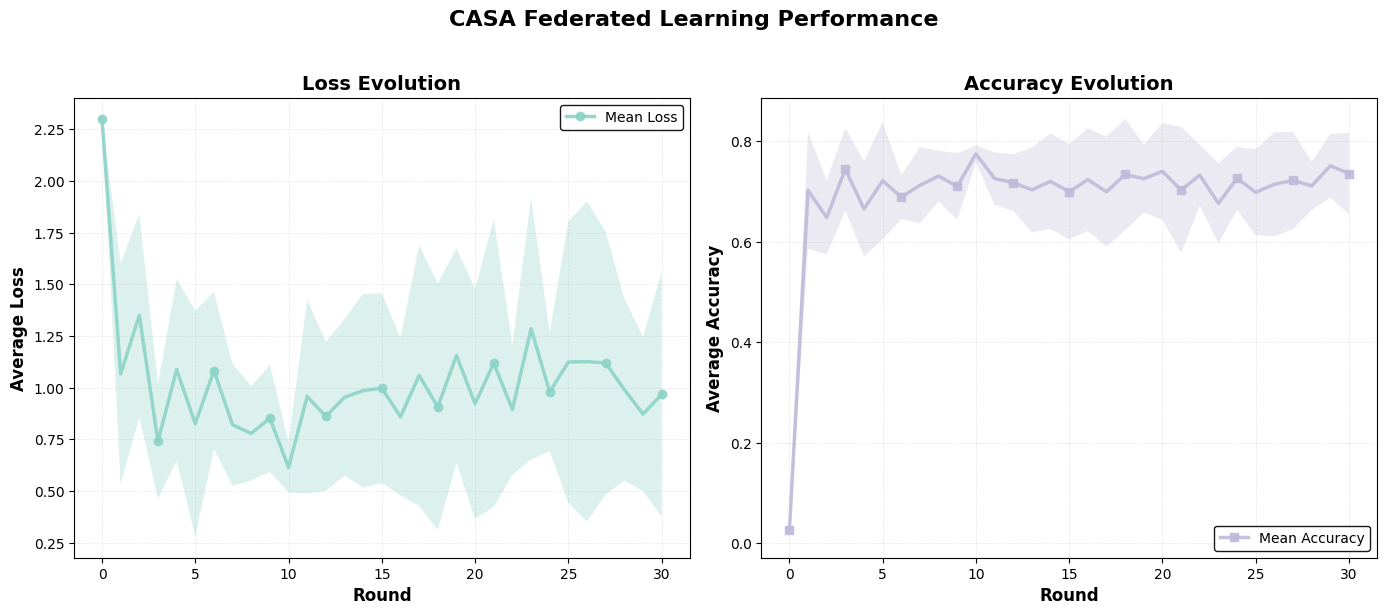

In [14]:
# Combined plot with MNIST grid styling
if not df_metrics.empty and not avg_loss.empty and not avg_accuracy.empty:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # Define colors from colormap
    colors = plt.cm.Set3(np.linspace(0, 1, 10))

    # Loss plot
    ax1.plot(
        avg_loss["round"],
        avg_loss["mean"],
        color=colors[0],
        linewidth=2.5,
        marker="o",
        markersize=6,
        markevery=max(1, len(avg_loss) // 10),
        label="Mean Loss",
        alpha=0.9,
    )

    # Add shaded area for std deviation
    ax1.fill_between(
        avg_loss["round"],
        avg_loss["mean"] - avg_loss["std"],
        avg_loss["mean"] + avg_loss["std"],
        alpha=0.3,
        color=colors[0],
        edgecolor="none",
    )

    ax1.set_xlabel("Round", fontsize=12, fontweight="bold")
    ax1.set_ylabel("Average Loss", fontsize=12, fontweight="bold")
    ax1.set_title("Loss Evolution", fontsize=14, fontweight="bold")
    ax1.grid(True, alpha=0.3, linestyle="--", linewidth=0.5)
    ax1.legend(loc="upper right", framealpha=0.9, edgecolor="black", fancybox=True)

    # Accuracy plot
    ax2.plot(
        avg_accuracy["round"],
        avg_accuracy["mean"],
        color=colors[2],
        linewidth=2.5,
        marker="s",
        markersize=6,
        markevery=max(1, len(avg_accuracy) // 10),
        label="Mean Accuracy",
        alpha=0.9,
    )

    # Add shaded area for std deviation
    ax2.fill_between(
        avg_accuracy["round"],
        avg_accuracy["mean"] - avg_accuracy["std"],
        avg_accuracy["mean"] + avg_accuracy["std"],
        alpha=0.3,
        color=colors[2],
        edgecolor="none",
    )

    ax2.set_xlabel("Round", fontsize=12, fontweight="bold")
    ax2.set_ylabel("Average Accuracy", fontsize=12, fontweight="bold")
    ax2.set_title("Accuracy Evolution", fontsize=14, fontweight="bold")
    ax2.grid(True, alpha=0.3, linestyle="--", linewidth=0.5)
    ax2.legend(loc="lower right", framealpha=0.9, edgecolor="black", fancybox=True)

    plt.suptitle("CASA Federated Learning Performance", fontsize=16, fontweight="bold", y=1.02)
    plt.tight_layout()
    plt.show()

## Individual Node Performance (Enhanced)

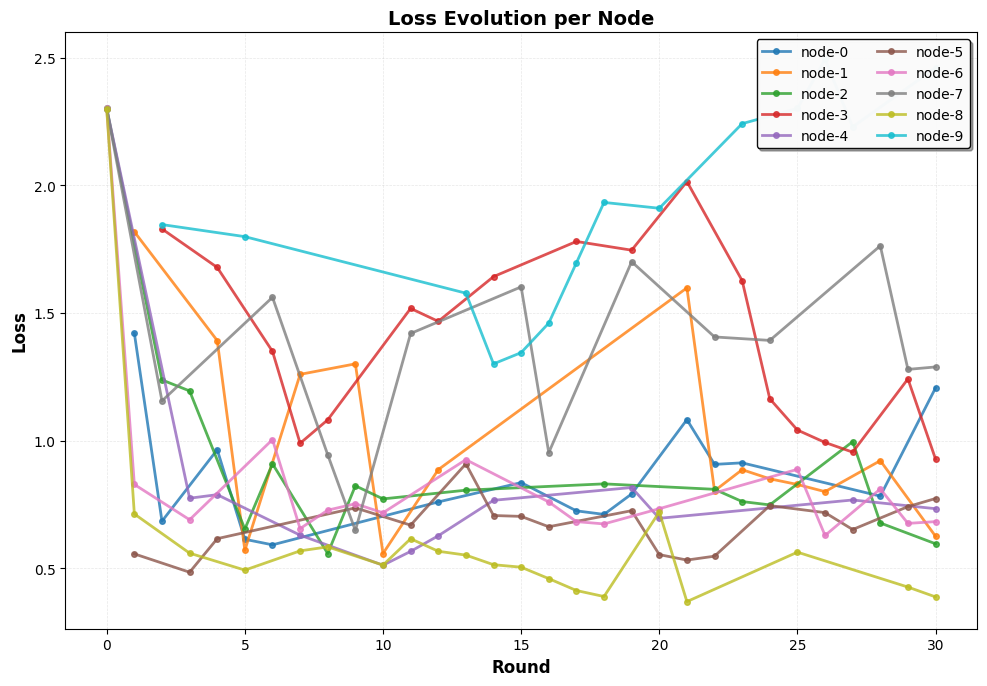

In [15]:
# Plot individual node loss with enhanced styling
if not df_metrics.empty:
    fig, ax = plt.subplots(figsize=(10, 7))

    # Loss per node
    loss_df = df_metrics[df_metrics["metric"] == "loss"]
    # Sort nodes numerically
    nodes = sorted(loss_df["node"].unique(), key=lambda x: int(x.split("-")[-1]) if "-" in x and x.split("-")[-1].isdigit() else x)

    # Use colormap for node colors
    colors = plt.cm.tab10(np.linspace(0, 1, len(nodes)))

    for idx, node in enumerate(nodes):
        node_data = loss_df[loss_df["node"] == node].sort_values("round")
        ax.plot(node_data["round"], node_data["value"], marker="o", markersize=4, label=node, alpha=0.8, linewidth=2, color=colors[idx])

    ax.set_xlabel("Round", fontsize=12, fontweight="bold")
    ax.set_ylabel("Loss", fontsize=12, fontweight="bold")
    ax.set_title("Loss Evolution per Node", fontsize=14, fontweight="bold")
    ax.grid(True, alpha=0.3, linestyle="--", linewidth=0.5)

    # Enhanced legend
    ax.legend(loc="upper right", ncol=2, framealpha=0.95, edgecolor="black", fancybox=True, shadow=True)

    plt.tight_layout()
    plt.show()

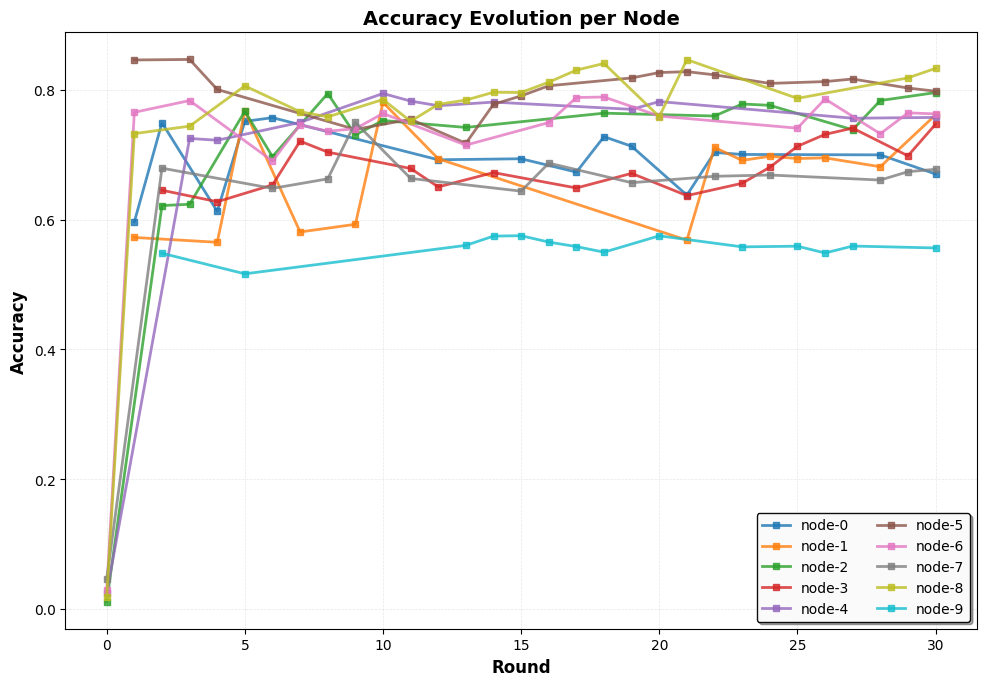

In [16]:
# Plot individual node accuracy with enhanced styling
if not df_metrics.empty:
    fig, ax = plt.subplots(figsize=(10, 7))

    # Accuracy per node
    acc_df = df_metrics[df_metrics["metric"] == "compile_metrics"]
    # Sort nodes numerically
    nodes = sorted(acc_df["node"].unique(), key=lambda x: int(x.split("-")[-1]) if "-" in x and x.split("-")[-1].isdigit() else x)

    # Use colormap for node colors
    colors = plt.cm.tab10(np.linspace(0, 1, len(nodes)))

    for idx, node in enumerate(nodes):
        node_data = acc_df[acc_df["node"] == node].sort_values("round")
        ax.plot(node_data["round"], node_data["value"], marker="s", markersize=4, label=node, alpha=0.8, linewidth=2, color=colors[idx])

    ax.set_xlabel("Round", fontsize=12, fontweight="bold")
    ax.set_ylabel("Accuracy", fontsize=12, fontweight="bold")
    ax.set_title("Accuracy Evolution per Node", fontsize=14, fontweight="bold")
    ax.grid(True, alpha=0.3, linestyle="--", linewidth=0.5)

    # Enhanced legend
    ax.legend(loc="lower right", ncol=2, framealpha=0.95, edgecolor="black", fancybox=True, shadow=True)

    plt.tight_layout()
    plt.show()

## Node Performance Distribution (Box Plot Style)

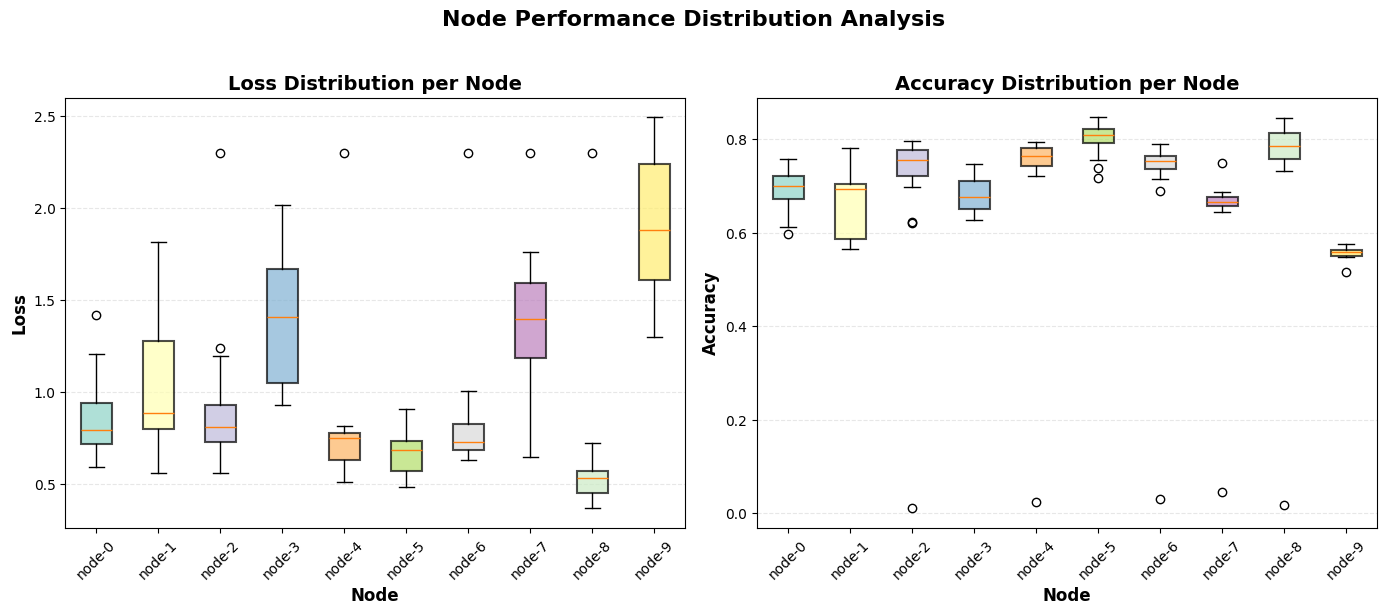

In [17]:
# Box plot for accuracy distribution across nodes
if not df_metrics.empty:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # Prepare data for loss box plot
    loss_df = df_metrics[df_metrics["metric"] == "loss"]
    nodes = sorted(loss_df["node"].unique(), key=lambda x: int(x.split("-")[-1]) if "-" in x and x.split("-")[-1].isdigit() else x)
    loss_data = [loss_df[loss_df["node"] == node]["value"].values for node in nodes]

    # Prepare data for accuracy box plot
    acc_df = df_metrics[df_metrics["metric"] == "compile_metrics"]
    acc_data = [acc_df[acc_df["node"] == node]["value"].values for node in nodes]

    # Define colors
    colors = plt.cm.Set3(np.linspace(0, 1, len(nodes)))

    # Loss box plot
    bp1 = ax1.boxplot(loss_data, labels=nodes, patch_artist=True)
    for patch, color in zip(bp1["boxes"], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
        patch.set_edgecolor("black")
        patch.set_linewidth(1.5)

    ax1.set_xlabel("Node", fontsize=12, fontweight="bold")
    ax1.set_ylabel("Loss", fontsize=12, fontweight="bold")
    ax1.set_title("Loss Distribution per Node", fontsize=14, fontweight="bold")
    ax1.grid(True, alpha=0.3, axis="y", linestyle="--")
    ax1.tick_params(axis="x", rotation=45)

    # Accuracy box plot
    bp2 = ax2.boxplot(acc_data, labels=nodes, patch_artist=True)
    for patch, color in zip(bp2["boxes"], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
        patch.set_edgecolor("black")
        patch.set_linewidth(1.5)

    ax2.set_xlabel("Node", fontsize=12, fontweight="bold")
    ax2.set_ylabel("Accuracy", fontsize=12, fontweight="bold")
    ax2.set_title("Accuracy Distribution per Node", fontsize=14, fontweight="bold")
    ax2.grid(True, alpha=0.3, axis="y", linestyle="--")
    ax2.tick_params(axis="x", rotation=45)

    plt.suptitle("Node Performance Distribution Analysis", fontsize=16, fontweight="bold", y=1.02)
    plt.tight_layout()
    plt.show()

## Final Performance Summary (Bar Chart Style)

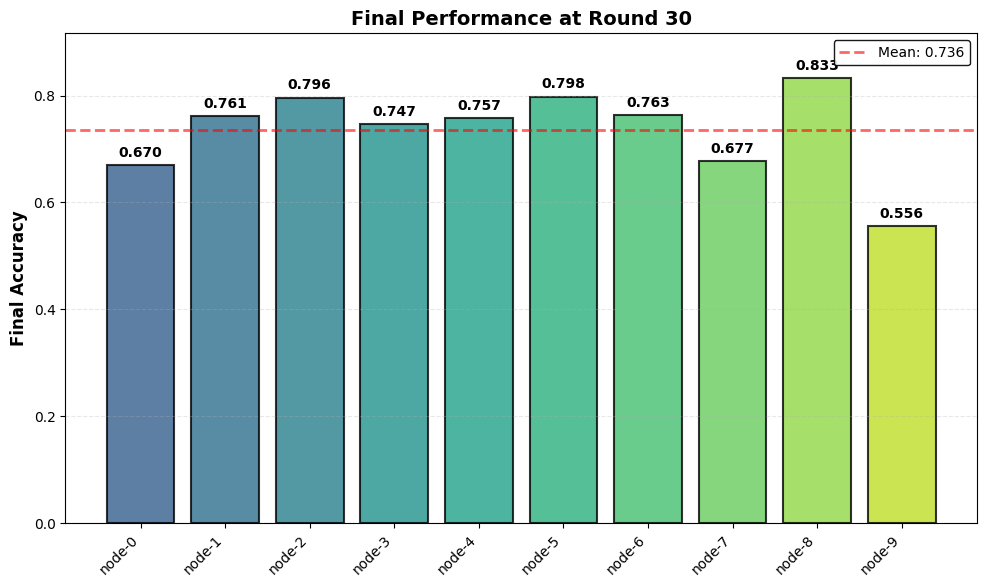

FINAL PERFORMANCE SUMMARY
Best Node: node-8 - Accuracy: 0.8330
Worst Node: node-9 - Accuracy: 0.5562
Mean Accuracy: 0.7359
Std Deviation: 0.0767


In [18]:
# Bar chart for final performance per node
if not df_metrics.empty:
    fig, ax = plt.subplots(figsize=(10, 6))

    # Get final round accuracy for each node
    acc_df = df_metrics[df_metrics["metric"] == "compile_metrics"]
    last_round = acc_df["round"].max()
    final_acc = acc_df[acc_df["round"] == last_round]

    # Sort nodes
    nodes = sorted(final_acc["node"].unique(), key=lambda x: int(x.split("-")[-1]) if "-" in x and x.split("-")[-1].isdigit() else x)

    # Get accuracy values
    acc_values = [final_acc[final_acc["node"] == node]["value"].values[0] for node in nodes]

    # Create bars with gradient effect
    colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(nodes)))
    bars = ax.bar(range(len(nodes)), acc_values, color=colors, alpha=0.8, edgecolor="black", linewidth=1.5)

    # Add value labels on bars
    for bar, value in zip(bars, acc_values):
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 0.01,
            f"{value:.3f}",
            ha="center",
            va="bottom",
            fontsize=10,
            fontweight="bold",
        )

    # Add mean line
    mean_acc = np.mean(acc_values)
    ax.axhline(y=mean_acc, color="red", linestyle="--", alpha=0.6, linewidth=2, label=f"Mean: {mean_acc:.3f}")

    ax.set_xticks(range(len(nodes)))
    ax.set_xticklabels(nodes, rotation=45, ha="right")
    ax.set_ylabel("Final Accuracy", fontsize=12, fontweight="bold")
    ax.set_title(f"Final Performance at Round {last_round}", fontsize=14, fontweight="bold")
    ax.grid(True, alpha=0.3, axis="y", linestyle="--")
    ax.legend(loc="upper right", framealpha=0.9, edgecolor="black", fancybox=True)
    ax.set_ylim([0, max(acc_values) * 1.1])

    plt.tight_layout()
    plt.show()

    # Print summary statistics
    print("=" * 60)
    print("FINAL PERFORMANCE SUMMARY")
    print("=" * 60)
    print(f"Best Node: {nodes[np.argmax(acc_values)]} - Accuracy: {max(acc_values):.4f}")
    print(f"Worst Node: {nodes[np.argmin(acc_values)]} - Accuracy: {min(acc_values):.4f}")
    print(f"Mean Accuracy: {mean_acc:.4f}")
    print(f"Std Deviation: {np.std(acc_values):.4f}")
    print("=" * 60)

## Performance Heatmap (Optional Advanced Visualization)

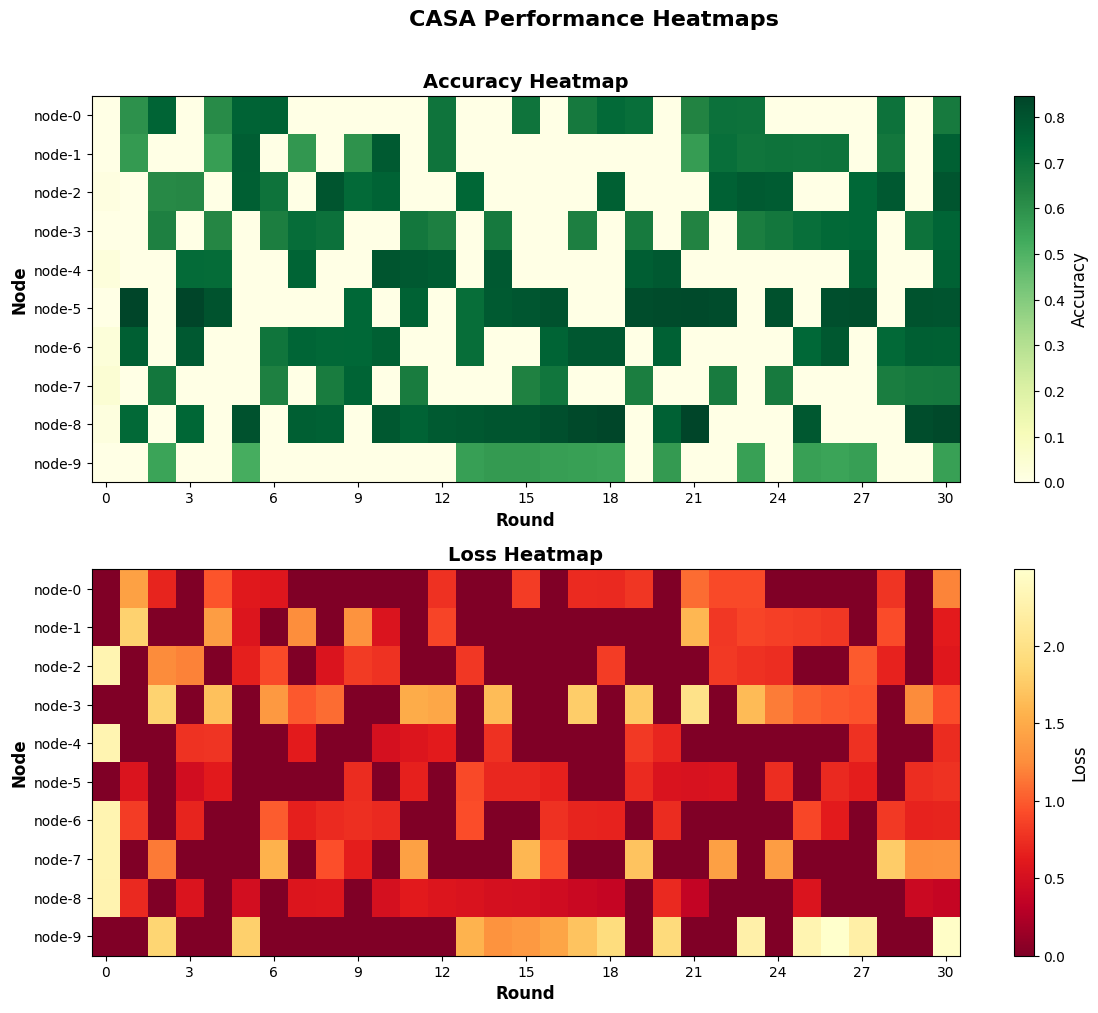

In [19]:
# Create a heatmap of node performance over rounds
if not df_metrics.empty:
    import warnings

    warnings.filterwarnings("ignore")

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

    # Prepare data for accuracy heatmap
    acc_df = df_metrics[df_metrics["metric"] == "compile_metrics"]
    nodes = sorted(acc_df["node"].unique(), key=lambda x: int(x.split("-")[-1]) if "-" in x and x.split("-")[-1].isdigit() else x)
    rounds = sorted(acc_df["round"].unique())

    # Create matrix for heatmap
    acc_matrix = np.zeros((len(nodes), len(rounds)))
    for i, node in enumerate(nodes):
        for j, round_num in enumerate(rounds):
            val = acc_df[(acc_df["node"] == node) & (acc_df["round"] == round_num)]["value"].values
            if len(val) > 0:
                acc_matrix[i, j] = val[0]

    # Accuracy heatmap
    im1 = ax1.imshow(acc_matrix, aspect="auto", cmap="YlGn", interpolation="nearest")
    ax1.set_xticks(range(0, len(rounds), max(1, len(rounds) // 10)))
    ax1.set_xticklabels([rounds[i] for i in range(0, len(rounds), max(1, len(rounds) // 10))])
    ax1.set_yticks(range(len(nodes)))
    ax1.set_yticklabels(nodes)
    ax1.set_xlabel("Round", fontsize=12, fontweight="bold")
    ax1.set_ylabel("Node", fontsize=12, fontweight="bold")
    ax1.set_title("Accuracy Heatmap", fontsize=14, fontweight="bold")
    plt.colorbar(im1, ax=ax1, label="Accuracy")

    # Prepare data for loss heatmap
    loss_df = df_metrics[df_metrics["metric"] == "loss"]

    # Create matrix for heatmap
    loss_matrix = np.zeros((len(nodes), len(rounds)))
    for i, node in enumerate(nodes):
        for j, round_num in enumerate(rounds):
            val = loss_df[(loss_df["node"] == node) & (loss_df["round"] == round_num)]["value"].values
            if len(val) > 0:
                loss_matrix[i, j] = val[0]

    # Loss heatmap
    im2 = ax2.imshow(loss_matrix, aspect="auto", cmap="YlOrRd_r", interpolation="nearest")
    ax2.set_xticks(range(0, len(rounds), max(1, len(rounds) // 10)))
    ax2.set_xticklabels([rounds[i] for i in range(0, len(rounds), max(1, len(rounds) // 10))])
    ax2.set_yticks(range(len(nodes)))
    ax2.set_yticklabels(nodes)
    ax2.set_xlabel("Round", fontsize=12, fontweight="bold")
    ax2.set_ylabel("Node", fontsize=12, fontweight="bold")
    ax2.set_title("Loss Heatmap", fontsize=14, fontweight="bold")
    plt.colorbar(im2, ax=ax2, label="Loss")

    plt.suptitle("CASA Performance Heatmaps", fontsize=16, fontweight="bold", y=1.01)
    plt.tight_layout()
    plt.show()